Process perspective
===================

Considering following instructions:
* Try to understand the file 'simple.csv' and how to read it.
* Understand the sorting of output
* Test the instruction *print(log)* and *print(len(log))*

In [94]:
# Listing 8 Reading and printing an event log with a dictionary

f = open('simple.csv', 'r')

log = dict()

for line in f:
    line = line.strip()
    if len(line) == 0:
        continue
    [caseid, task, user, timestamp] = line.split(';')
    if caseid not in log:
        log[caseid] = []
    event = (task, user, timestamp)
    log[caseid].append(event)
    
f.close()

#Listing 10 Sorting the output by caseid and the events by timestamp

for caseid in sorted(log.keys()):
    log[caseid].sort(key = lambda event: event[-1])
    for (task, user, timestamp) in log[caseid]:
        print(caseid, task, user, timestamp)


1 a u1 2016-04-09 17:36:47
1 b u3 2016-04-11 09:11:13
1 d u6 2016-04-12 10:00:12
1 e u7 2016-04-12 18:21:32
1 f u8 2016-04-13 13:27:41
1 g u6 2016-04-18 19:14:14
1 h u2 2016-04-19 16:48:16
2 a u2 2016-04-14 08:56:09
2 b u3 2016-04-14 09:36:02
2 d u5 2016-04-15 10:16:40
2 g u6 2016-04-19 15:39:15
2 e u7 2016-04-20 14:39:45
2 f u8 2016-04-22 09:16:16
2 h u1 2016-04-26 12:19:46
3 a u2 2016-04-25 08:39:24
3 b u4 2016-04-29 10:56:14
3 c u1 2016-04-30 15:41:22


In [95]:
# Listing 11 Implementing the control-flow algorithm in Python

F = dict()
for caseid in log:
    for i in range(0, len(log[caseid])-1):
        ai = log[caseid][i][0]
        aj = log[caseid][i+1][0] 
        if ai not in F:
            F[ai] = dict()
        if aj not in F[ai]:
            F[ai][aj] = 0
        F[ai][aj] += 1

for ai in sorted(F.keys()):
    for aj in sorted(F[ai].keys()):
        print(ai, '->', aj, ':', F[ai][aj])


a -> b : 3
b -> c : 1
b -> d : 2
d -> e : 1
d -> g : 1
e -> f : 2
f -> g : 1
f -> h : 1
g -> e : 1
g -> h : 1


Considerer following instructions:
* Understand how to count each transition
* Test the file generated by `print(G)` in the webpage https://dreampuf.github.io/GraphvizOnline/
* Test other forms of drawing and interpret: 
     * `G.graph_attr['rankdir'] = 'TD'`
     * `G.graph_attr['size'] = '5'`
     * `G.graph_attr['size'] = '1, 3'`

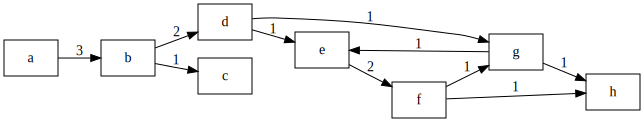

In [96]:
# Listing 13 Definition of a directed graph in Graphviz’s DOT language

import graphviz as gv

G = gv.Digraph(strict=False)
G.graph_attr['rankdir'] = 'LR'
G.node_attr['shape'] = 'box'

for ai in F:
    for aj in F[ai]:
        G.edge(ai, aj, label=str(F[ai][aj]))

G

You can use different options for drawing with *Graphviz*, whic can be found in https://www.graphviz.org/doc/info/attrs.html#d:color. Consider the following instructions:
* How to setting the edge thickness according to the transition count
* How to create the *edges*
* Test different colors of edges, for example: `G.edge(ai, aj, label=str(x), penwidth=str(y), color="blue")`

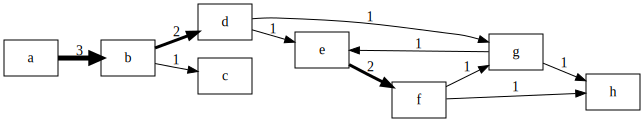

In [97]:
# Listing 15 Setting the edge thickness according to the transition count

import graphviz as gv

G = gv.Digraph(strict=False)
G.graph_attr['rankdir'] = 'LR'
G.node_attr['shape'] = 'box'

values = [F[ai][aj] for ai in F for aj in F[ai]]
x_min = min(values)
x_max = max(values)
y_min = 1.0
y_max = 5.0

for ai in F:
    for aj in F[ai]:
        x = F[ai][aj]
        y = y_min + (y_max-y_min) * float(x-x_min) / float(x_max-x_min)
        G.edge(ai, aj, label=str(x), penwidth=str(y))

G

Consider the following instructions:
* How to setting the color according to the task count. You can find color names by navigating in: https://www.graphviz.org/doc/info/colors.html.
* How to write the number of tasks.
* Consult the Python flow control `if-elif-else`, and try to draw a flow with following characteristics:
    - Tasks that are the *most* frequent use color `red`.
    - Tasks that are the *middle* frequent use color `yellow`.
    - Tasks that are the *least* frequent use color `green`.
    - Take care with the font colors!

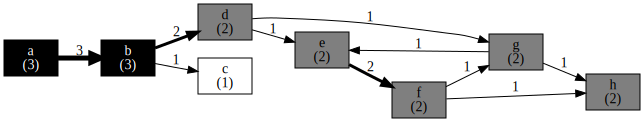

In [98]:
# Listing 17 Including the activity counts in the graph

import graphviz as gv

G = gv.Digraph(strict=False)
G.graph_attr['rankdir'] = 'LR'
G.node_attr['shape'] = 'box'

A = dict()
for caseid in log:
    for i in range(0, len(log[caseid])):
        ai = log[caseid][i][0]
        if ai not in A:
            A[ai] = 0
        A[ai] += 1

x_min = min(A.values())
x_max = max(A.values())
for ai in A:
    text = ai + '\n(' + str(A[ai]) + ')'
    gray = int(float(x_max - A[ai]) / float(x_max - x_min) * 100.)
    fill = 'gray' + str(gray) # See https://www.graphviz.org/doc/info/colors.html
    font = 'black'
    if gray < 50:
        font = 'white'
    G.node(ai, label=text, style='filled', fillcolor=fill, fontcolor=font)

values = [F[ai][aj] for ai in F for aj in F[ai]]
x_min = min(values)
x_max = max(values)
y_min = 1.0
y_max = 5.0
for ai in F:
    for aj in F[ai]:
        x = F[ai][aj]
        y = y_min + (y_max-y_min) * float(x-x_min) / float(x_max-x_min)
        G.edge(ai, aj, label=str(x), penwidth=str(y))

G

Consider how to read *timestamps*

In [99]:
# Listing 31 Parsing the timestamps when reading the event log
import datetime

f = open('simple.csv', 'r')

log = dict()

for line in f:
    line = line.strip()
    if len(line) == 0:
        continue
    parts = line.split(';')
    caseid = parts[0]
    task = parts[1]
    user = parts[2]
    timestamp = datetime.datetime.strptime(parts[3], '%Y-%m-%d %H:%M:%S')
    if caseid not in log:
        log[caseid] = []
    event = (task, user, timestamp)
    log[caseid].append(event)
    
f.close()

for caseid in log:
    for (task, user, timestamp) in log[caseid]:
        print(caseid, task, user, timestamp)

1 a u1 2016-04-09 17:36:47
1 b u3 2016-04-11 09:11:13
1 d u6 2016-04-12 10:00:12
1 e u7 2016-04-12 18:21:32
1 f u8 2016-04-13 13:27:41
1 g u6 2016-04-18 19:14:14
1 h u2 2016-04-19 16:48:16
2 a u2 2016-04-14 08:56:09
2 b u3 2016-04-14 09:36:02
2 d u5 2016-04-15 10:16:40
2 g u6 2016-04-19 15:39:15
2 e u7 2016-04-20 14:39:45
2 f u8 2016-04-22 09:16:16
2 h u1 2016-04-26 12:19:46
3 a u2 2016-04-25 08:39:24
3 b u4 2016-04-29 10:56:14
3 c u1 2016-04-30 15:41:22


Understand how to calculate the average timestamp as difference for each transition

In [100]:
# Listing 32 Calculating the average timestamp difference for each transition
D = dict()
for caseid in log:
    for i in range(0,len(log[caseid])-1):
        (ai,_,ti) = log[caseid][i]
        (aj,_,tj) = log[caseid][i+1]
        if ai not in D:
            D[ai] = dict()
        if aj not in D[ai]:
            D[ai][aj] = []
        D[ai][aj].append(tj-ti)
        
for ai in sorted(D.keys()):
    for aj in sorted(D[ai].keys()):
        sum_td = sum(D[ai][aj], datetime.timedelta(0))
        count_td = len(D[ai][aj])
        avg_td = sum_td/count_td
        avg_td -= datetime.timedelta(microseconds=avg_td.microseconds)
        D[ai][aj] = avg_td
        print(ai, '->', aj, ':', D[ai][aj])

a -> b : 1 day, 22:10:23
b -> c : 1 day, 4:45:08
b -> d : 1 day, 0:44:48
d -> e : 8:21:20
d -> g : 4 days, 5:22:35
e -> f : 1 day, 6:51:20
f -> g : 5 days, 5:46:33
f -> h : 4 days, 3:03:30
g -> e : 23:00:30
g -> h : 21:34:02


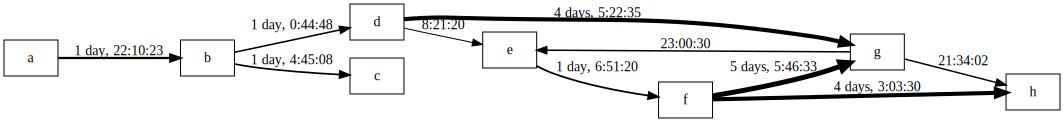

In [101]:
# Listing 34 Drawing the graph with average timestamp differences

import graphviz as gv

G = gv.Digraph(strict=False)

G.graph_attr['rankdir'] = 'LR'
G.node_attr['shape'] = 'box'

values = [D[ai][aj].total_seconds() for ai in D for aj in D[ai]]
x_min = min(values)
x_max = max(values)

y_min = 1.0
y_max = 5.0

for ai in D:
    for aj in D[ai]:
        x = D[ai][aj].total_seconds()
        y = y_min + (y_max-y_min) * float(x-x_min) / float(x_max-x_min)
        G.edge(ai, aj, label=str(D[ai][aj]), penwidth=str(y))

G

Organizational mining
=====================

> *Handover* measure

Consider the command *print H*

In [102]:
# Listing 20 Implementing the handover-of-work algorithm in Python

H = dict()

for caseid in log:
    for i in range(0, len(log[caseid])-1):
        ui = log[caseid][i][1]
        uj = log[caseid][i+1][1]
        if ui not in H:
            H[ui] = dict()
        if uj not in H[ui]:
            H[ui][uj] = 0
        H[ui][uj] += 1

The following algorithm draw the network generated by the *handover measure*. It counts the number of cases are passed between the users each other. As before, we draw the network by using *graphviz*. Interpret the following network:

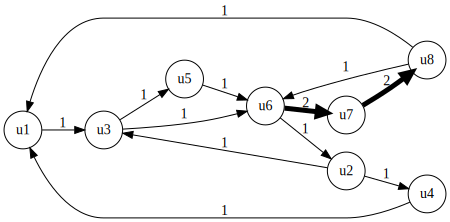

In [103]:
# Listing 21 Generating the output graph with Graphviz

import graphviz as pg

G = gv.Digraph(strict=False)

G.graph_attr['rankdir'] = 'LR'
G.node_attr['shape'] = 'circle'

values = [H[ui][uj] for ui in H for uj in H[ui]]
x_min = min(values)
x_max = max(values)

y_min = 1.0
y_max = 5.0

for ui in H:
    for uj in H[ui]:
        x = H[ui][uj]
        y = y_min + (y_max-y_min) * float(x-x_min) / float(x_max-x_min)
        G.edge(ui, uj, label=str(x), penwidth=str(y))

G

The package *graphviz* is a marvelous tools for drawing network, but it does not able to calculate some important network characteristics as *centrality measures*. Who is the most important user in the network? Who is the most influent?

We will calculate three important centrality measures: (a) closeness, (b) betweenness, and (c) eigenvector. Good definitions and interpretation about these measures you can find in https://en.wikipedia.org/wiki/Centrality.

A better package to calculate these measures is *networkx*. First, let us draw the last network using *networkx*. Let us observe, the small difference between the instruction `G.edge` in *graphviz* and `G.add_edge` in *networkx*. Furthermore, note that *networkx* does not have a good algorithm for drawing like *graphviz*.

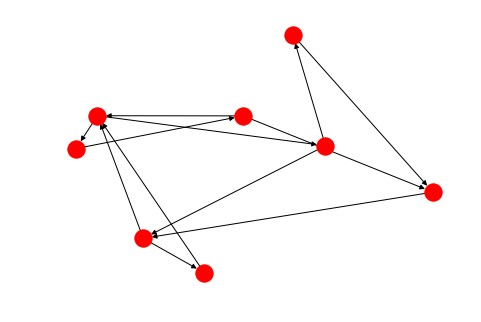

In [104]:
import networkx as nx

G = nx.DiGraph()

values = [H[ui][uj] for ui in H for uj in H[ui]]
x_min = min(values)
x_max = max(values)

y_min = 1.0
y_max = 5.0

for ui in H:
    for uj in H[ui]:
        x = H[ui][uj]
        y = y_min + (y_max-y_min) * float(x-x_min) / float(x_max-x_min)
        G.add_edge(ui, uj, weight=y)

nx.draw(G)

We are trying to improve some deficiencies of *networkx* drawing. Let us study the following network!

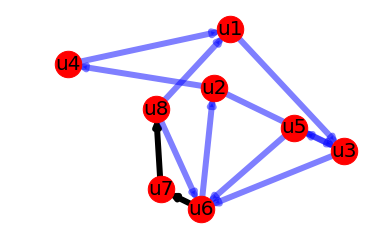

In [105]:
import matplotlib.pyplot as plt

elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] >  3.0] # Why '3'?
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] <= 3.0]

pos = nx.spring_layout(G)  # positions for all nodes

# nodes
nx.draw_networkx_nodes(G, pos, node_size=700)

# edges
nx.draw_networkx_edges(G, pos, edgelist=elarge, width=6)
nx.draw_networkx_edges(G, pos, edgelist=esmall, width=6, alpha=0.5, edge_color='b', style='dashed')

# labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family='sans-serif')

plt.axis('off')
plt.show()

Now we are going to calculate the centrality measures (remember definitions and examples in https://en.wikipedia.org/wiki/Centrality):

In [106]:
import scipy

print('closeness centrality:')
centrality = nx.closeness_centrality(G)
print(['{} {:0.2f}'.format(node, centrality[node]) for node in centrality])

print('betweenness centrality:')
centrality = nx.betweenness_centrality(G, normalized=True)
print(['{} {:0.2f}'.format(node, centrality[node]) for node in centrality])

centrality = nx.eigenvector_centrality_numpy(G)
print('eigenvector centrality:')
print(['{} {:0.2f}'.format(node, centrality[node]) for node in centrality])

print('weighted eigenvector centrality:')
centrality = nx.eigenvector_centrality_numpy(G, weight='weight')
print(['{} {:0.2f}'.format(node, centrality[node]) for node in centrality])

closeness centrality:
['u1 0.41', 'u3 0.50', 'u6 0.58', 'u5 0.39', 'u7 0.41', 'u2 0.41', 'u8 0.32', 'u4 0.35']
betweenness centrality:
['u1 0.24', 'u3 0.43', 'u6 0.60', 'u5 0.00', 'u7 0.18', 'u2 0.25', 'u8 0.18', 'u4 0.06']
eigenvector centrality:
['u1 0.29', 'u3 0.41', 'u6 0.57', 'u5 0.26', 'u7 0.36', 'u2 0.36', 'u8 0.23', 'u4 0.23']
weighted eigenvector centrality:
['u1 0.26', 'u3 0.11', 'u6 0.30', 'u5 0.04', 'u7 0.48', 'u2 0.10', 'u8 0.77', 'u4 0.03']


Finally, we will plot two measures in a bar chart:

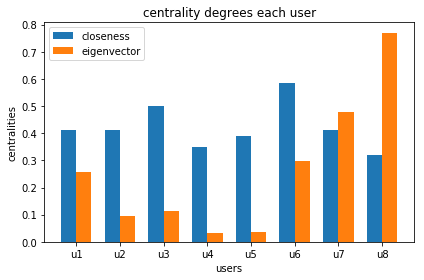

In [107]:
import matplotlib.pyplot as plt
import numpy as np

x = sorted([node for node in nx.nodes(G)])

n_groups = len(x)
index = np.arange(n_groups)

centrality = nx.closeness_centrality(G)
cl = [centrality[i] for i in x]
centrality = nx.eigenvector_centrality_numpy(G, weight='weight')
wev = [centrality[i] for i in x]

fig, ax = plt.subplots()

bar_width = 0.35
ax.bar(index,              cl, bar_width, label='closeness')
ax.bar(index + bar_width, wev, bar_width, label='eigenvector')

ax.set_xlabel('users')
ax.set_ylabel('centralities')
ax.set_title('centrality degrees each user')
ax.set_xticks(index + bar_width/2)
ax.set_xticklabels(x)
ax.legend()

fig.tight_layout()
plt.show()

> Working together measure

Groups of users, who are working together according the cases. Following algorithm counts the number of cases in which each pair of users are working together in the same case.

In [108]:
# Listing 22 Implementing the working together algorithm
W = dict()

for caseid in log:
    S = set()
    for i in range(0, len(log[caseid])):
        ui = log[caseid][i][1]
        S.add(ui)
    S = sorted(list(S))
    for i in range(0, len(S)-1):
        for j in range(i+1, len(S)):
            ui = S[i]
            uj = S[j]
            if ui not in W:
                W[ui] = dict()
            if uj not in W[ui]:
                W[ui][uj] = 0
            W[ui][uj] += 1

for ui in sorted(W.keys()):
    for uj in sorted(W[ui].keys()):
        print(ui, '--', uj, ':', W[ui][uj])

u1 -- u2 : 3
u1 -- u3 : 2
u1 -- u4 : 1
u1 -- u5 : 1
u1 -- u6 : 2
u1 -- u7 : 2
u1 -- u8 : 2
u2 -- u3 : 2
u2 -- u4 : 1
u2 -- u5 : 1
u2 -- u6 : 2
u2 -- u7 : 2
u2 -- u8 : 2
u3 -- u5 : 1
u3 -- u6 : 2
u3 -- u7 : 2
u3 -- u8 : 2
u5 -- u6 : 1
u5 -- u7 : 1
u5 -- u8 : 1
u6 -- u7 : 2
u6 -- u8 : 2
u7 -- u8 : 2


According the last result, interpret the following network (let us not that it is a not directed - edges without direction - graph!):

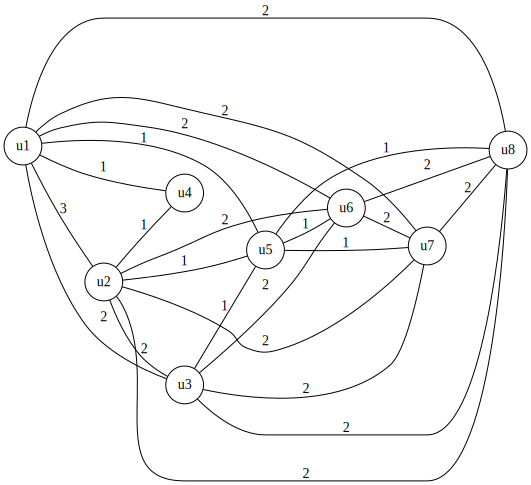

In [109]:
# Listing 24 Generating an undirected graph with Graphviz
import graphviz as gv

G = gv.Graph(strict=False)

G.graph_attr['rankdir'] = 'LR'
G.node_attr['shape'] = 'circle'

for ui in W:
    for uj in W[ui]:
        G.edge(ui, uj, label=str(W[ui][uj]))

G

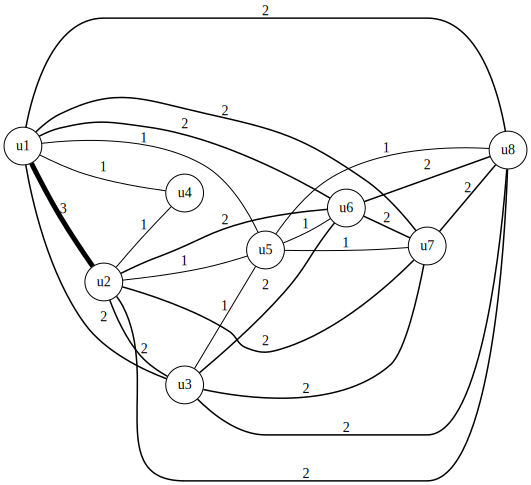

In [110]:
# Listing 24 Generating an undirected graph with PyGraphviz
import graphviz as gv

G = gv.Graph(strict=False)

G.graph_attr['rankdir'] = 'LR'
G.node_attr['shape'] = 'circle'

values = [W[ui][uj] for ui in W for uj in W[ui]]
x_min = min(values)
x_max = max(values)

y_min = 1.0
y_max = 5.0

for ui in W:
    for uj in W[ui]:
        x = W[ui][uj]
        y = y_min + (y_max-y_min) * (float(x-x_min) / float(x_max-x_min))**3
        G.edge(ui, uj, label=str(x), penwidth=str(y))

G

> *Users and activites* measures: groups according the shared activities

In the last graph, the links between nodes represent the number of shared cases between users. This measure is used to analyze the relationships between users is the number of shared activities.

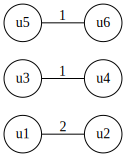

In [36]:
# Listing 26 Collecting the set of activities performed by each user
import graphviz as gv

UA = dict()
for caseid in log:
    for i in range(0, len(log[caseid])):
        ai = log[caseid][i][0]
        ui = log[caseid][i][1]
        if ui not in UA:
            UA[ui] = set()
        UA[ui].add(ai)

G = gv.Graph(strict=False)

G.graph_attr['rankdir'] = 'LR'
G.node_attr['shape'] = 'circle'

U = sorted(UA.keys())
for i in range(0, len(U)-1):
    for j in range(i+1, len(U)):
        ui = U[i]
        uj = U[j]
        x = len(UA[ui] & UA[uj])
        if x > 0:
            G.edge(ui, uj, label=str(x))

G

> Relationship between users and activities

Now we will investigate the relation between users and activities. How many times each user did each activity?

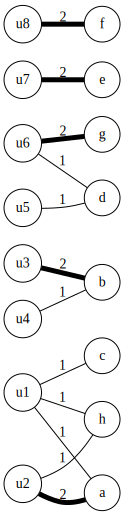

In [39]:
# Listing 28 Counting the number of times that each user performed each task

import graphviz as gv

UA = dict()
for caseid in log:
    for i in range(0, len(log[caseid])):
        ai = log[caseid][i][0]
        ui = log[caseid][i][1]
        if ui not in UA:
            UA[ui] = dict()
        if ai not in UA[ui]:
            UA[ui][ai] = 0
        UA[ui][ai] += 1

G = gv.Graph(strict=False)

G.graph_attr['rankdir'] = 'LR'
G.node_attr['shape'] = 'circle'

values = [UA[ui][ai] for ui in UA for ai in UA[ui]]
x_min = min(values)
x_max = max(values)

y_min = 1.0
y_max = 5.0

for ui in UA:
    for ai in UA[ui]:
        x = UA[ui][ai]
        y = y_min + (y_max-y_min) * float(x-x_min) / float(x_max-x_min)
        G.edge(ui, ai, label=str(x), penwidth=str(y))

G

Performance perspective
=======================

Timeline of each case in absolute time axis.

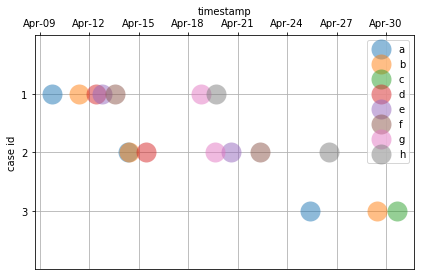

In [68]:
# Listing 35 Plotting a dotted chart with Matplotlib

import matplotlib.pyplot as plt
import matplotlib.dates as mdates


X = dict()
Y = dict()

caseids = sorted(log.keys(),key=lambda caseid: log[caseid][0][-1])

for (y, caseid) in enumerate(caseids): 
    for i in range(0, len(log[caseid])):
        (a, _, x) = log[caseid][i]
        if a not in X:
            X[a] = []
            Y[a] = []
        X[a].append(x)
        Y[a].append(y)

for a in sorted(X.keys()): 
    plt.plot(X[a], Y[a], 'o', label=a, markersize=20, markeredgewidth=0., alpha=0.5)

axes = plt.gca()

axes.set_yticks(range(len(caseids)))
axes.set_ylim(-1, len(caseids))
axes.set_yticklabels(caseids)
axes.set_ylabel('case id')
axes.invert_yaxis()

axes.set_xlabel('timestamp')
axes.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d')) # test '%m-%d-%y'
axes.xaxis.tick_top() 
axes.xaxis.set_label_position('top')

plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


Timeline of each case in relative time axis

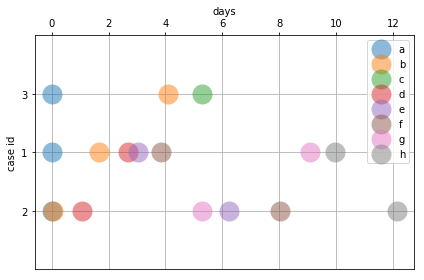

In [91]:
# Listing 36 Plotting a dotted chart with relative time

import matplotlib.pyplot as plt

X = dict()
Y = dict()

caseids = sorted(log.keys(),key=lambda caseid: log[caseid][-1][-1]-log[caseid][0][-1])

first_n = 3 # The three first cases
caseids = caseids[0:first_n]

for (y, caseid) in enumerate(caseids):
    x0 = log[caseid][0][-1]
    for i in range(0, len(log[caseid])):
        (a, _, x) = log[caseid][i]
        if a not in X:
            X[a] = []
            Y[a] = []
        X[a].append((x-x0).total_seconds()/(24*3600))
        Y[a].append(y)


for a in sorted(X.keys()): 
    plt.plot(X[a], Y[a], 'o', label=a, markersize=20, markeredgewidth=0., alpha=0.5)

axes = plt.gca()

axes.set_yticks(range(len(caseids)))
axes.set_ylim(-1, len(caseids))
axes.set_yticklabels(caseids)
axes.set_ylabel('case id')
axes.invert_yaxis()

axes.set_xlabel('days') 
axes.xaxis.tick_top() 
axes.xaxis.set_label_position('top')

plt.grid(True)
plt.legend(numpoints=1)
plt.tight_layout()
plt.show()

task:  a


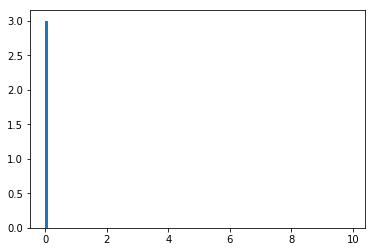

task:  b


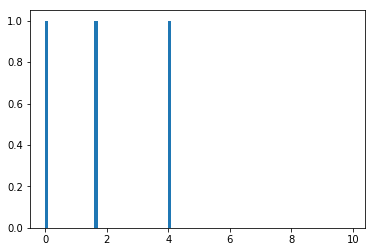

task:  c


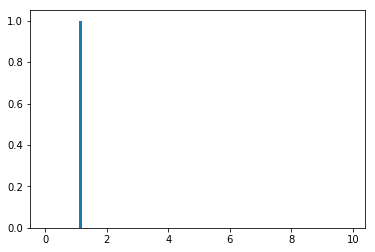

task:  d


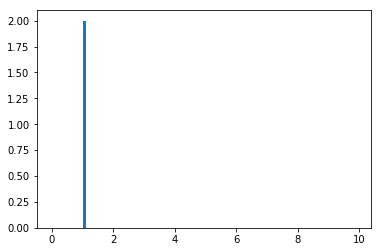

task:  e


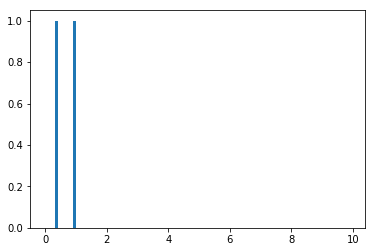

task:  f


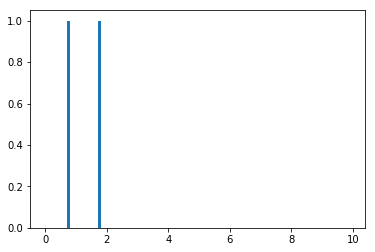

task:  g


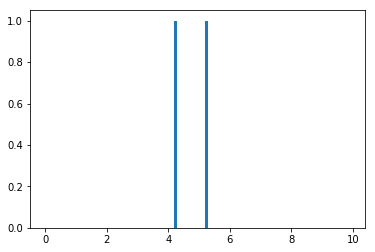

task:  h


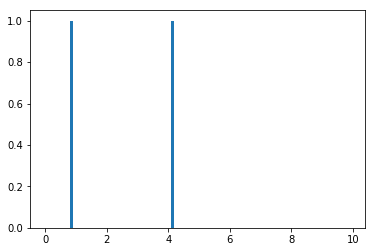

In [92]:
# Listing 37 Plotting the histograms of activity execution time

import numpy as np
import matplotlib.pyplot as plt

D = dict()

for caseid in log:
    for i in range(0, len(log[caseid])):
        (a, _, t) = log[caseid][i] 
        if i > 0:
            (_, _, t0) = log[caseid][i-1]
            d = (t-t0).total_seconds()/(24*3600)
        else:
            d = 0. 
        if a not in D:
            D[a] = []
        D[a].append(d)

i = 0
for a in sorted(D.keys()):
    print('task: ',sorted(D.keys())[i])
    i += 1
    plt.hist(D[a], bins=[0.1*k for k in range(100)])
    plt.show()